## GROUP ID :- 03

## P519 Insurance Project

## EDA( EXPLORATORY DATA ANALYSIS )

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('Claimants.csv') 

In [130]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## DATA PREPROCESSING

In [132]:
# Check the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape} (Rows, Columns)")


Shape of the DataFrame: (1340, 13) (Rows, Columns)


In [133]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
5,97,0,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses
6,10,0,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean
7,36,0,1.0,1.0,0.0,34.0,3013.37,Moderate,4037.99,1,3710.12,Comprehensive,Clean
8,51,1,1.0,1.0,0.0,60.0,6936.94,Severe,11869.31,0,11751.25,Comprehensive,Major Offenses
9,55,1,0.0,1.0,0.0,NaN,4542.14,Severe,8717.78,1,6689.05,Comprehensive,Minor Offenses


In [134]:
print("\nLast 10 rows of the dataset:")
df.tail(10)


Last 10 rows of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1330,34011,1,0.0,1.0,0.0,33.0,6956.56,Severe,9640.98,1,7661.99,Comprehensive,Clean
1331,34030,0,1.0,1.0,0.0,3.0,4845.11,Minor,6374.67,0,4571.05,Comprehensive,Minor Offenses
1332,34066,1,1.0,1.0,0.0,9.0,8370.08,Severe,12167.97,1,11315.70,Third-Party,Major Offenses
1333,34089,1,0.0,1.0,0.0,49.0,4411.81,Moderate,6296.14,0,5733.47,Third-Party,Minor Offenses
1334,34104,1,1.0,1.0,0.0,16.0,3414.72,Severe,6348.42,0,5074.96,Comprehensive,Minor Offenses
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean
1339,34153,1,1.0,1.0,0.0,30.0,10548.36,Moderate,13522.19,1,11138.01,Third-Party,Clean


## DATATYPES

In [136]:
# Check the data types of each column
print("\nData types of each column:")
df.dtypes


Data types of each column:


CASENUM                     int64
ATTORNEY                    int64
CLMSEX                    float64
CLMINSUR                  float64
SEATBELT                  float64
CLMAGE                    float64
LOSS                      float64
Accident_Severity          object
Claim_Amount_Requested    float64
Claim_Approval_Status       int64
Settlement_Amount         float64
Policy_Type                object
Driving_Record             object
dtype: object

In [137]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [138]:
df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Accident_Severity', 'Claim_Amount_Requested',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type',
       'Driving_Record'],
      dtype='object')

In [139]:
print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [140]:
df.duplicated().sum() 

np.int64(0)

In [141]:
df[df.duplicated()]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [142]:
df.isna().sum() 

CASENUM                     0
ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

<Axes: >

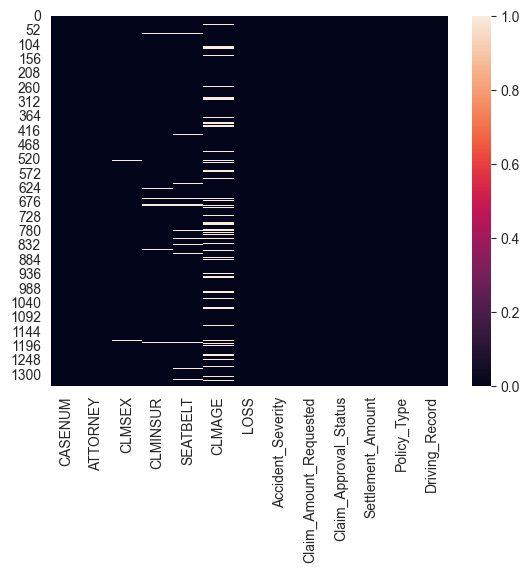

In [143]:
# visualize the missing values:-
sns.heatmap(df.isna()) 

In [144]:
# Fill missing values (if any) with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)


In [145]:
df.isna().sum()  

CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64

In [146]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [147]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## VISUALIZATION TECHNIQUES

## HISTOGRAM FOR SKEWNESS

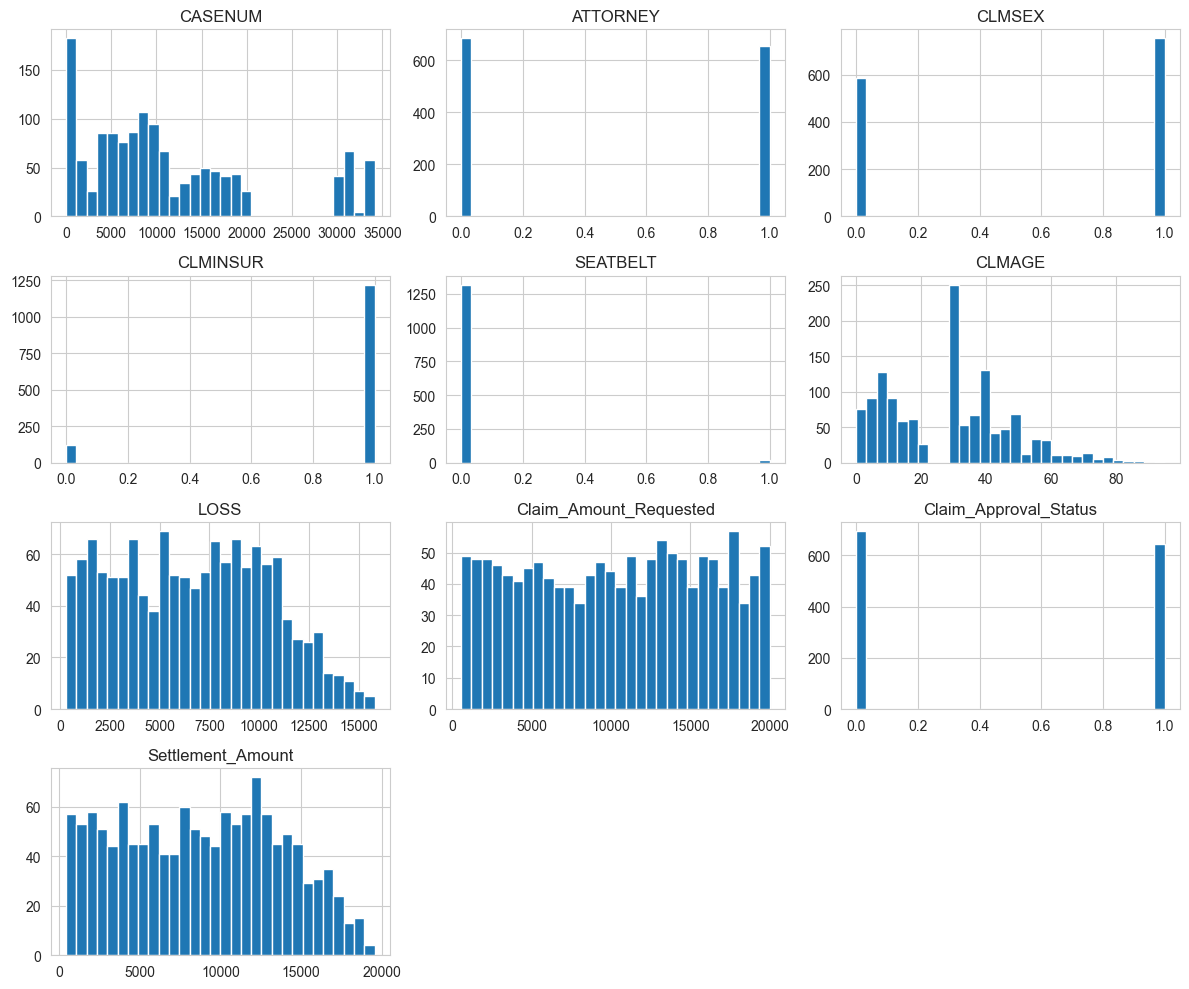

In [150]:
# Visualize distributions using histograms
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

## OUTLIER DETECTION USING BOXPLOT

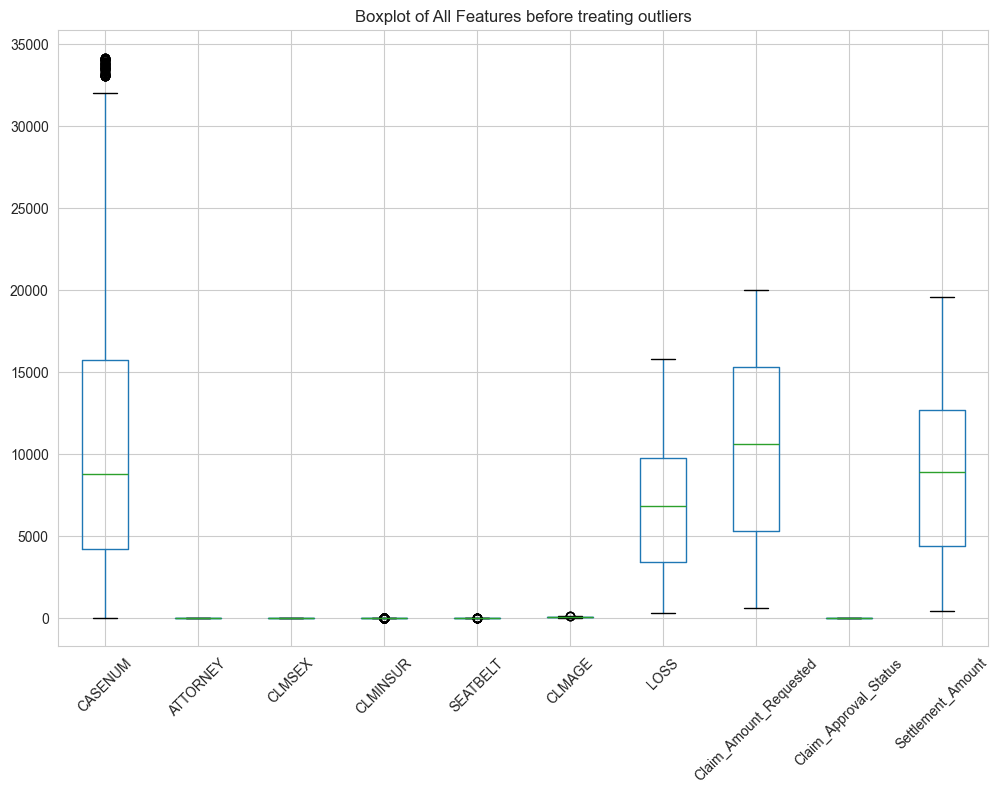

In [152]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features before treating outliers")
plt.xticks(rotation=45)
plt.show()

In [153]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [154]:
# there are outliers present in 3 colums 

## OUTLIER'S TREATMENT

In [156]:
# now to treat the outliers we have :- 
# capping :- Replacing outlier values 
# in capping all outlier values will be replaced by upper extreme or lower extreme values 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)   # lower quartile
    q3 = data[colname].quantile(0.75)   # upper quartile
    iqr = q3-q1   # calculating inter quartile range 

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [157]:
outlier_detection(df,'CLMINSUR')   

lower_extreme:- 1.0 , upper_extreme:- 1.0 , q1:- 1.0 , q3:- 1.0


In [158]:
df[df['CLMINSUR']>35.0]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [159]:
df.loc[df['CLMINSUR']>1 ,'CLMINSUR'] = 1
df.loc[df['CLMINSUR']<1 ,'CLMINSUR'] = 1

In [160]:
df[df['CLMINSUR']==1] 

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,1.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,1.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [161]:
df[df['CLMINSUR']== 1]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,1.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,1.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [162]:
outlier_detection(df,'SEATBELT')

lower_extreme:- 0.0 , upper_extreme:- 0.0 , q1:- 0.0 , q3:- 0.0


In [163]:
df.loc[df['SEATBELT']>0,'SEATBELT'] = 0
df.loc[df['SEATBELT']<0,'SEATBELT'] = 0

In [164]:
outlier_detection(df,'CLMAGE')

lower_extreme:- -35.0 , upper_extreme:- 85.0 , q1:- 10.0 , q3:- 40.0


In [165]:
df.loc[df['CLMAGE']>85,'CLMAGE'] = 85
df.loc[df['CLMAGE']<-35,'CLMAGE'] = -35

In [166]:
outlier_detection(df,'CASENUM')

lower_extreme:- -13111.25 , upper_extreme:- 32990.75 , q1:- 4177.0 , q3:- 15702.5


In [167]:
df.loc[df['CASENUM']>32900,'CASENUM'] = 32990
df.loc[df['CASENUM']<-13111.25,'CASENUM'] = -13111.25

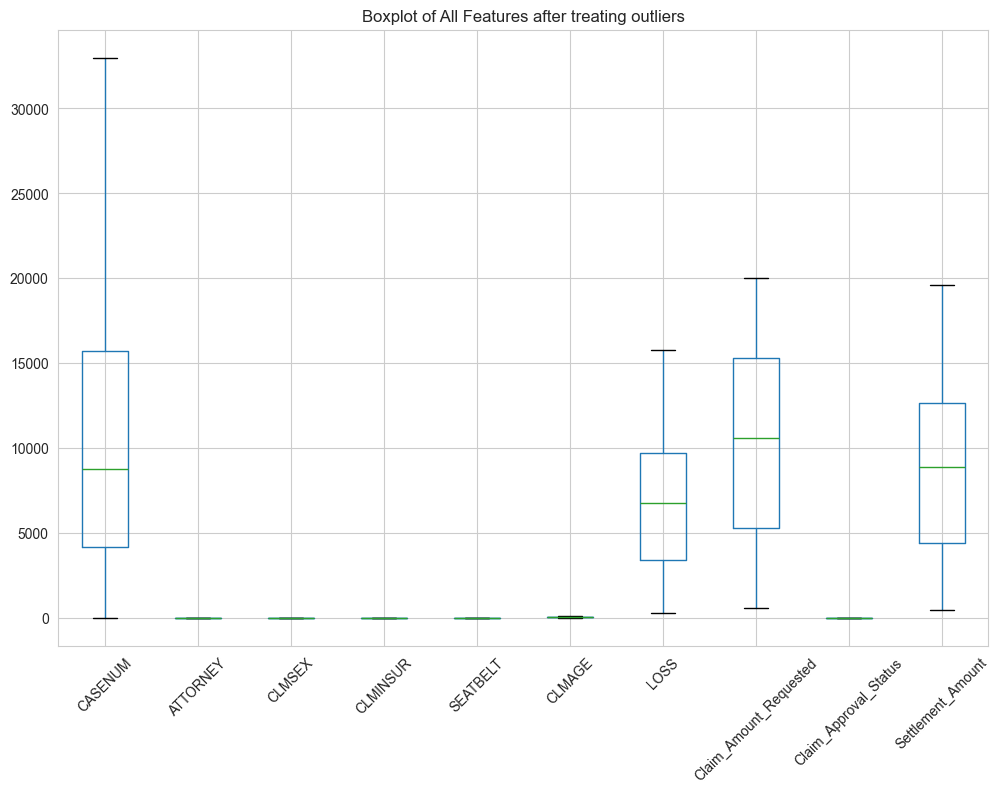

In [168]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features after treating outliers")
plt.xticks(rotation=45)
plt.show()   # all outliers are treated and , now no outliers are present , as can be seen using boxplot

## PAIRPLOT :- A COMBINATION OF HISTOGRAM AND SCATTER PLOT

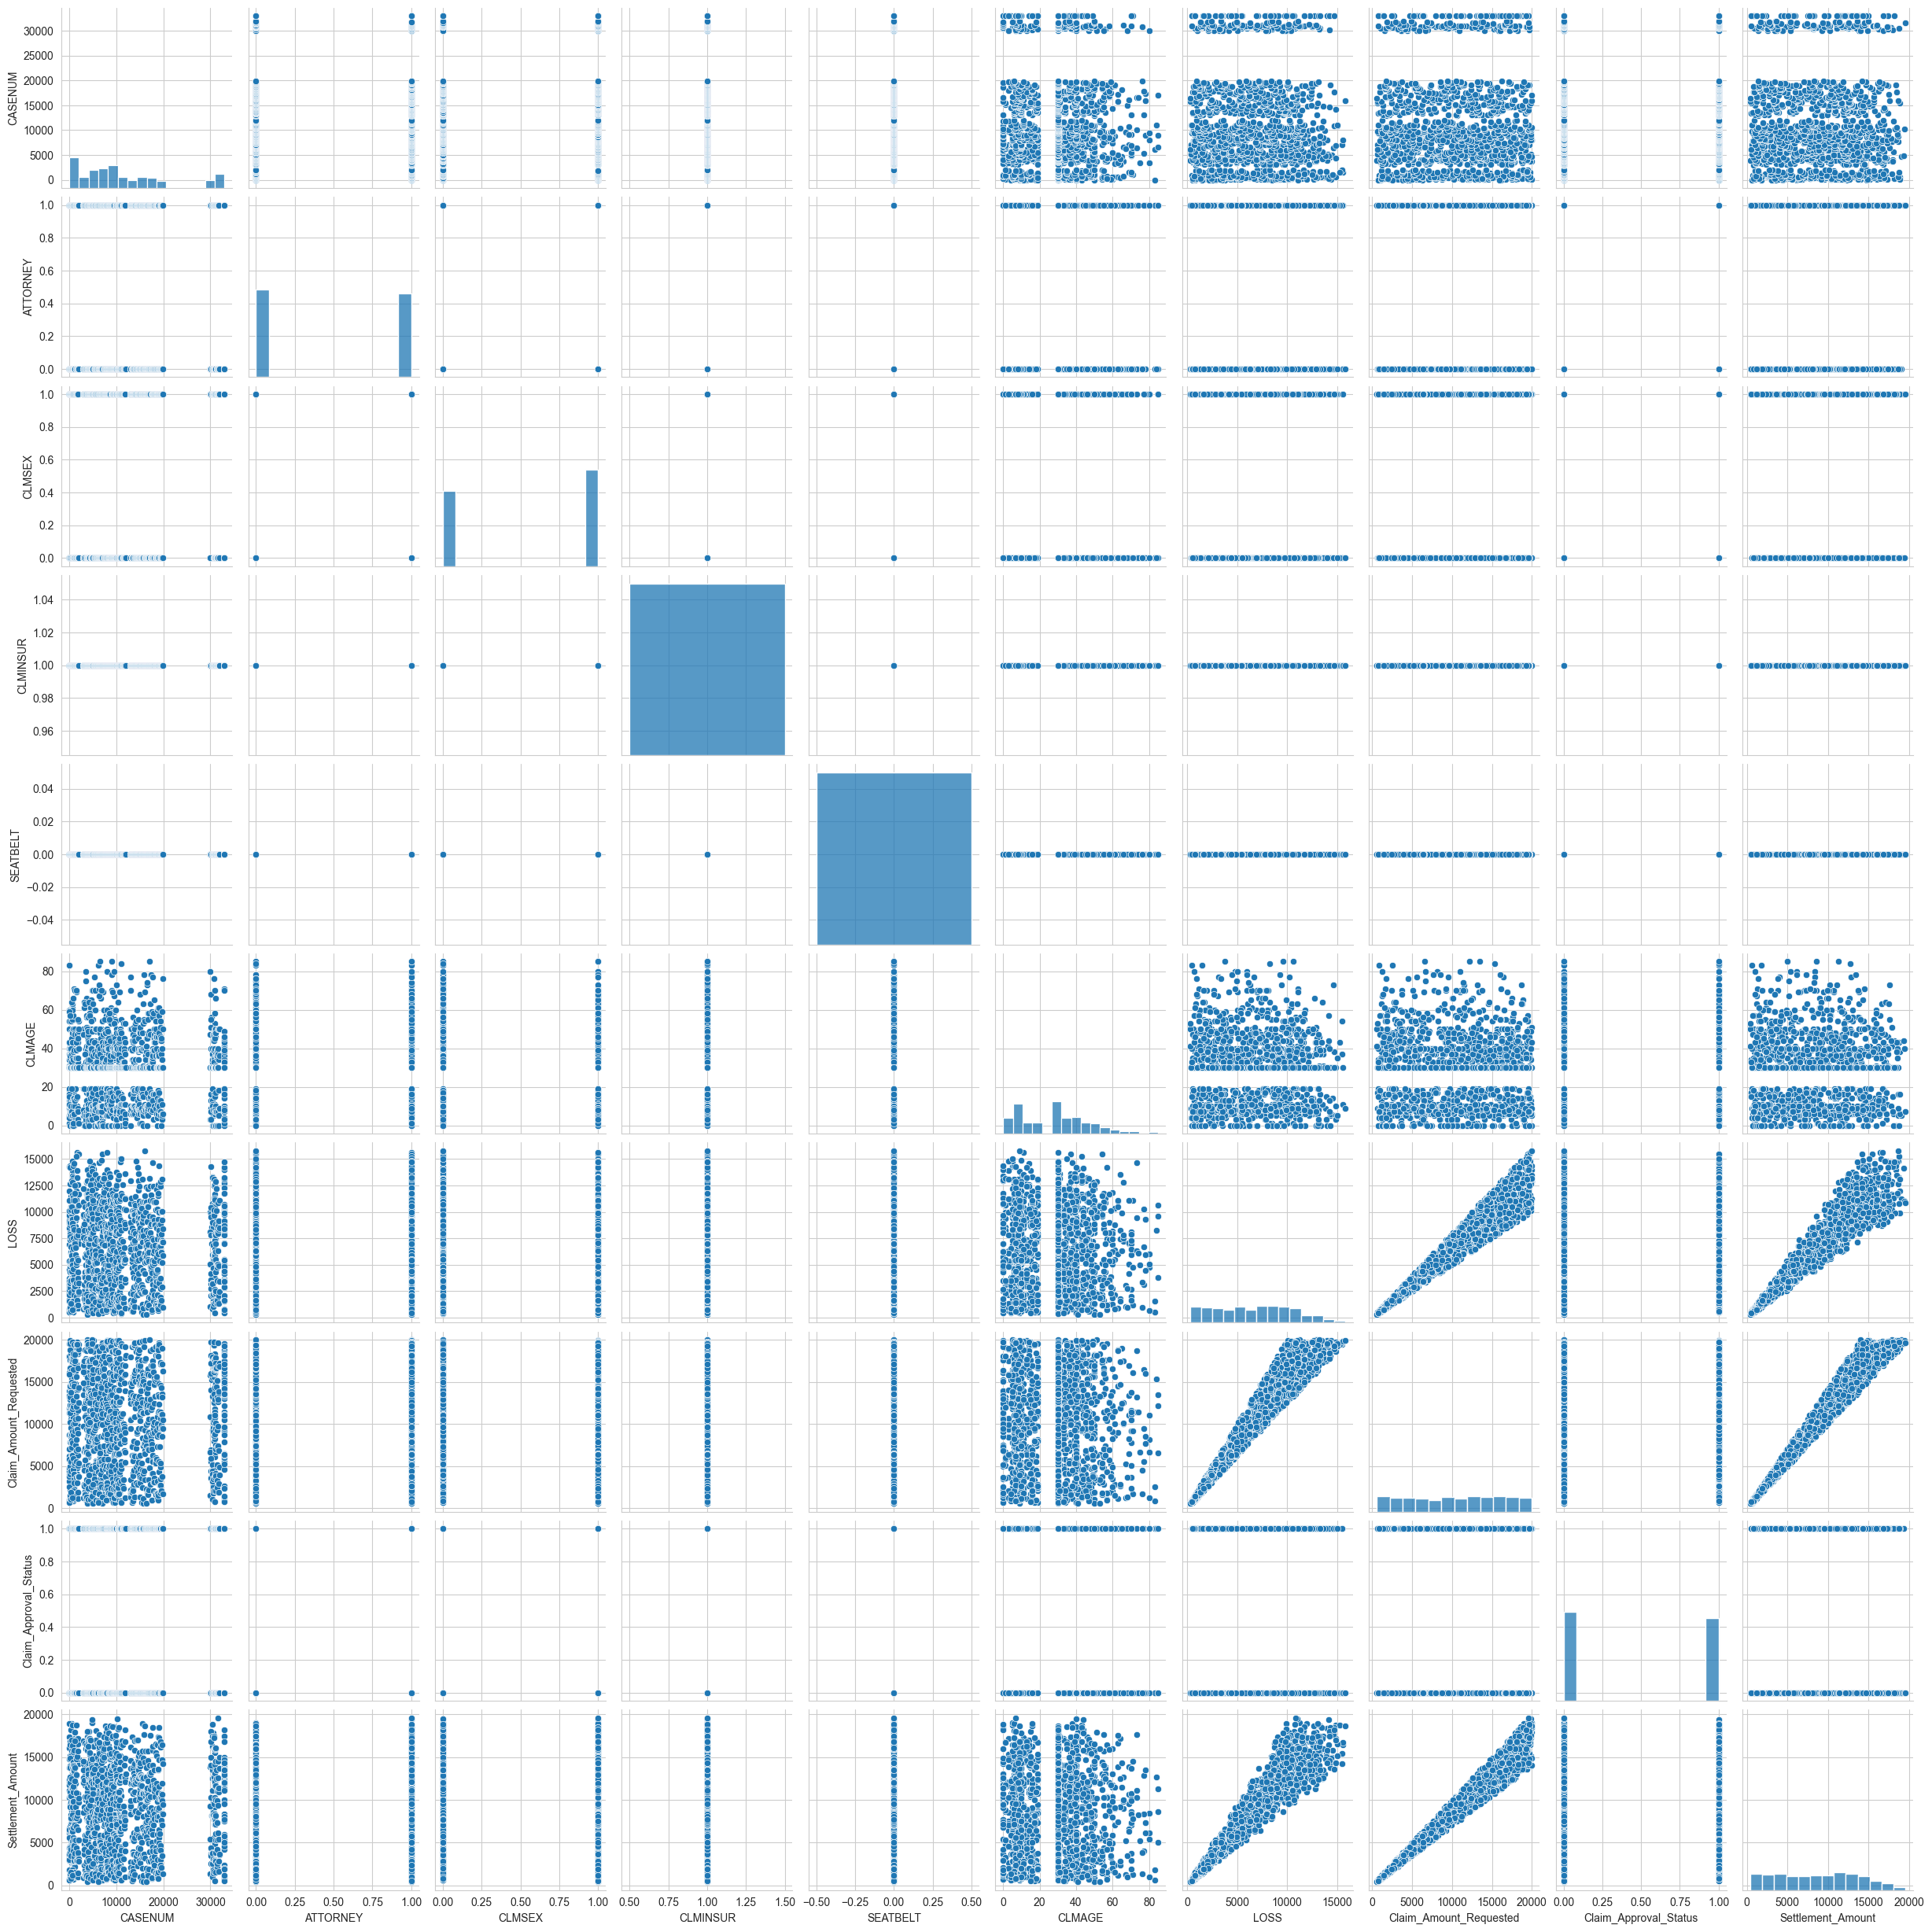

In [170]:
sns.pairplot(df)
plt.show()# for all features

In [171]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5.0,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3.0,1,1.0,1.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66.0,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70.0,0,0.0,1.0,0.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96.0,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,32990.0,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,32990.0,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,32990.0,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,32990.0,0,1.0,1.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## CORRELATION MATRIX AND HEATMAP

<Axes: >

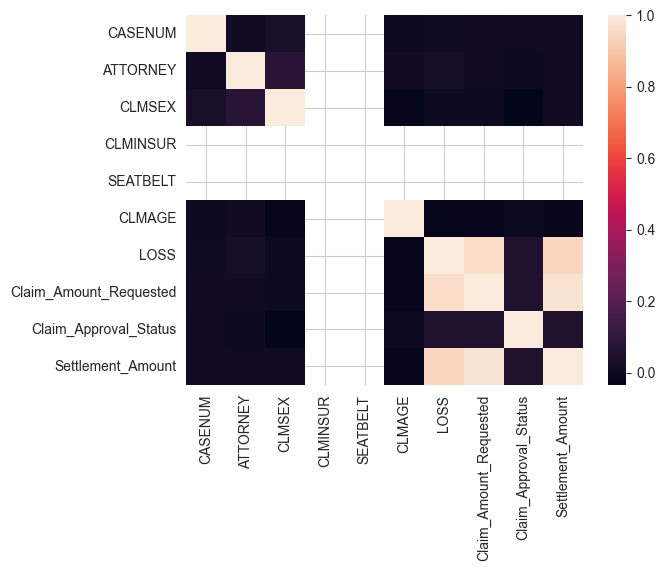

In [173]:
sns.heatmap(df.corr(numeric_only=True))

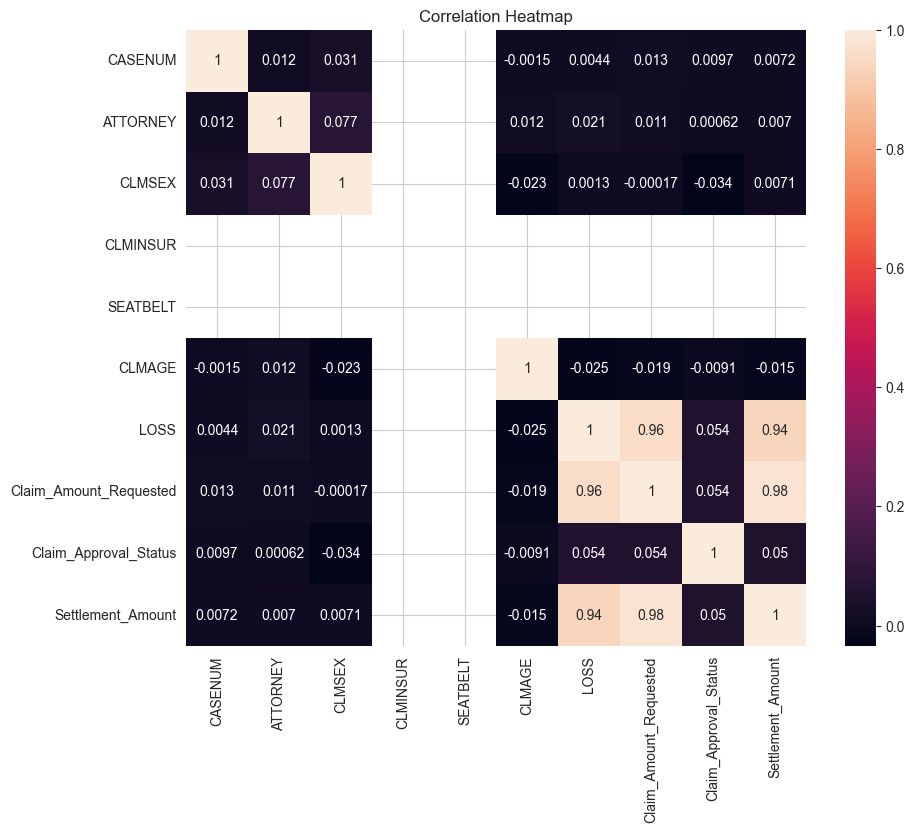

In [174]:
# Check for multicollinearity using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()
# colors are representing correlation value also

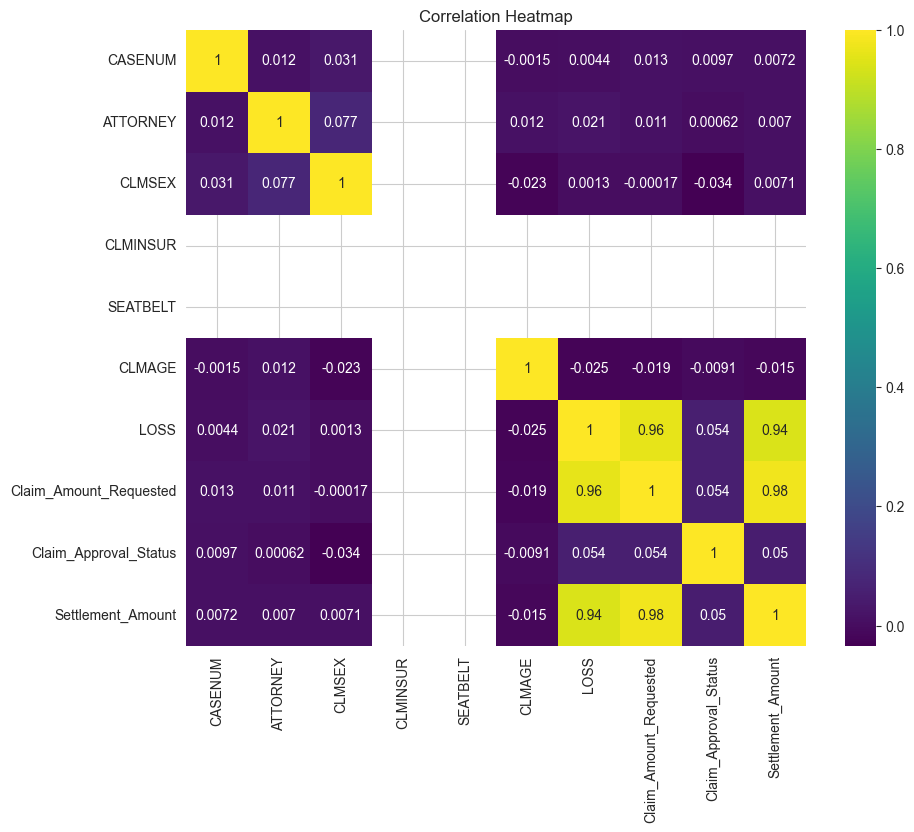

In [175]:
# Check for multicollinearity using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [176]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5.0,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3.0,1,1.0,1.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66.0,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70.0,0,0.0,1.0,0.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96.0,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,32990.0,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,32990.0,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,32990.0,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,32990.0,0,1.0,1.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## SCATTER PLOT

Text(0, 0.5, 'Claim_Amount_Requested')

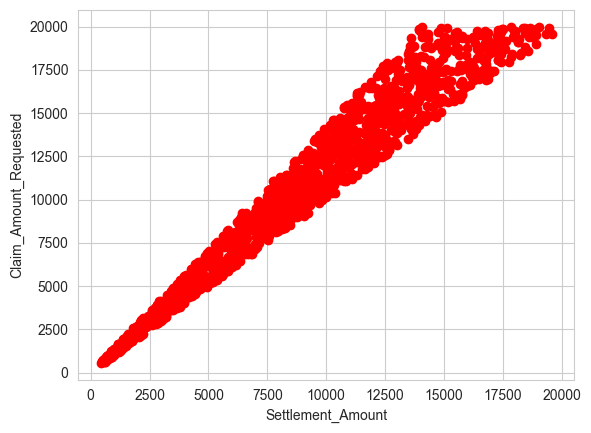

In [178]:
plt.scatter(df['Settlement_Amount'],df['Claim_Amount_Requested'],color='red')  
plt.xlabel('Settlement_Amount')
plt.ylabel('Claim_Amount_Requested')
# a strong neg correlation btwn them

Text(0, 0.5, 'LOSS')

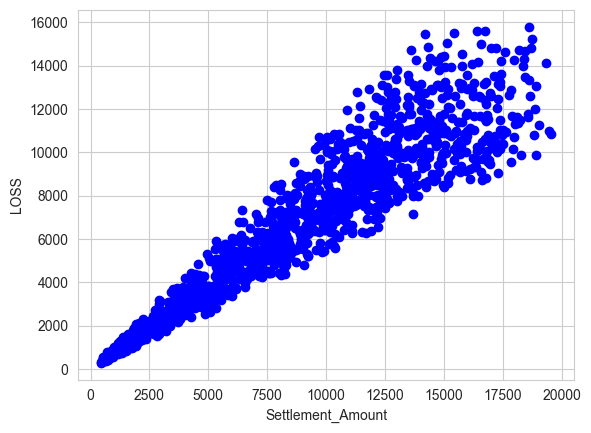

In [179]:
plt.scatter(df['Settlement_Amount'],df['LOSS'],color='blue')   
plt.xlabel('Settlement_Amount')
plt.ylabel('LOSS')

### LINE PLOT

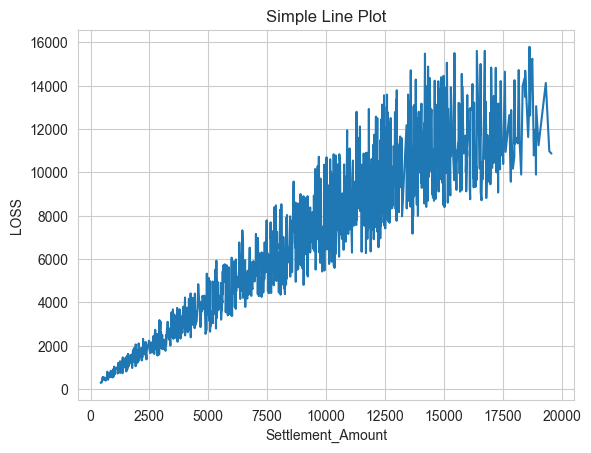

In [181]:
sns.lineplot(x='Settlement_Amount', y='LOSS', data=df)
plt.title('Simple Line Plot')
plt.show()

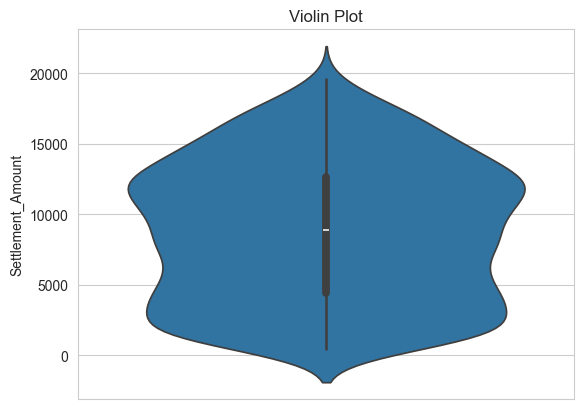

In [182]:
# Create a violin plot to visualize distribution and density
sns.violinplot( y='Settlement_Amount', data=df)
plt.title('Violin Plot')
plt.show()

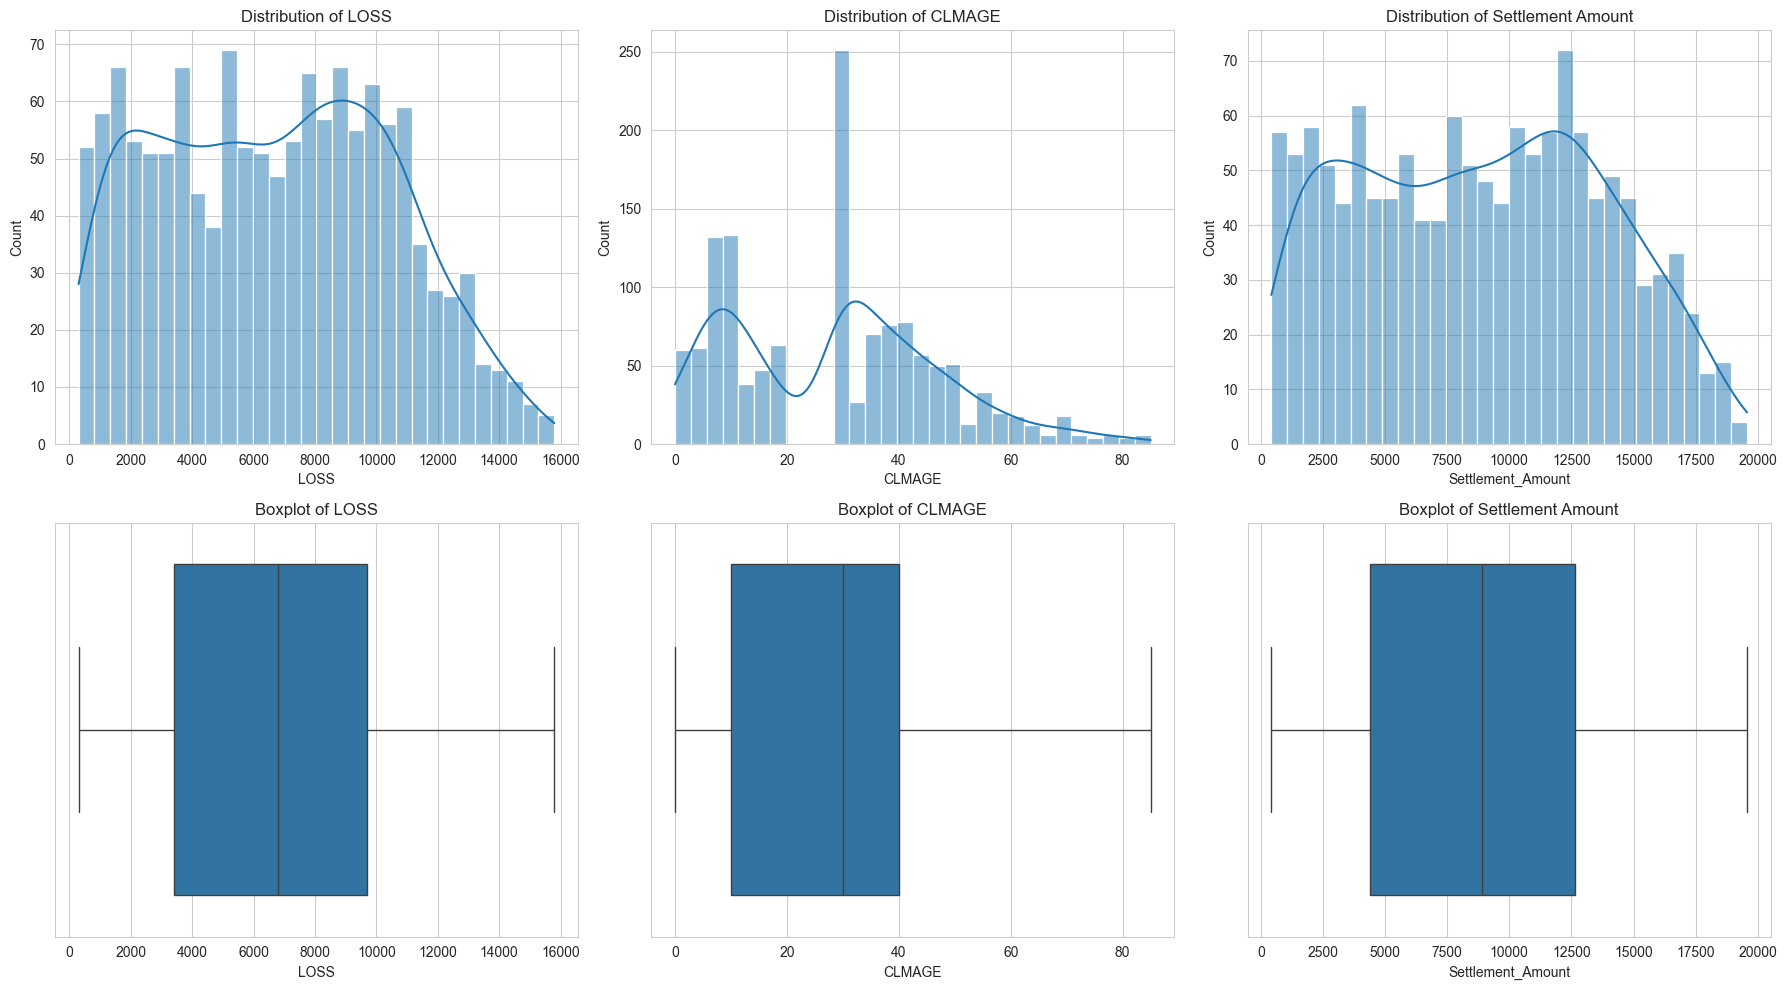

In [183]:
# Visualize distributions
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['LOSS'], bins=30, kde=True, ax=axes[0, 0]).set_title("Distribution of LOSS")
sns.histplot(df['CLMAGE'].dropna(), bins=30, kde=True, ax=axes[0, 1]).set_title("Distribution of CLMAGE")
sns.histplot(df['Settlement_Amount'], bins=30, kde=True, ax=axes[0, 2]).set_title("Distribution of Settlement Amount")

sns.boxplot(x=df['LOSS'], ax=axes[1, 0]).set_title("Boxplot of LOSS")
sns.boxplot(x=df['CLMAGE'], ax=axes[1, 1]).set_title("Boxplot of CLMAGE")
sns.boxplot(x=df['Settlement_Amount'], ax=axes[1, 2]).set_title("Boxplot of Settlement Amount")

plt.tight_layout()
plt.show()


In [184]:
from sklearn.preprocessing import LabelEncoder


In [185]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Accident_Severity', 'Policy_Type', 'Driving_Record']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le




In [186]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5.0,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,1,0
1,3.0,1,1.0,1.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,0,0
2,66.0,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,0,2
3,70.0,0,0.0,1.0,0.0,31.0,519.12,2,753.54,1,596.25,0,0
4,96.0,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,32990.0,1,0.0,1.0,0.0,30.0,11749.94,1,14992.27,0,13533.51,0,0
1336,32990.0,0,1.0,1.0,0.0,46.0,776.62,1,1438.79,0,1178.05,1,1
1337,32990.0,1,1.0,1.0,0.0,39.0,13261.20,2,18106.45,1,16782.44,1,2
1338,32990.0,0,1.0,1.0,0.0,8.0,9919.60,0,17119.15,1,14315.98,1,0


In [187]:
print(df['Accident_Severity'].value_counts())

Accident_Severity
0    465
2    440
1    435
Name: count, dtype: int64


In [188]:
print(df['Policy_Type'].value_counts())

Policy_Type
0    689
1    651
Name: count, dtype: int64


In [189]:
print(df['Driving_Record'].value_counts())

Driving_Record
2    473
0    448
1    419
Name: count, dtype: int64


In [190]:
scaler = StandardScaler()
numeric_features = [col for col in df if col != "ATTORNEY"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [191]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-1.182463,0,-1.134323,0.0,0.0,1.137765,-1.140900,1.239846,-1.029498,1.039589,-1.126567,1.028772,-1.229024
1,-1.182675,1,0.881583,0.0,0.0,-0.565764,-0.776553,-1.194431,-0.726652,1.039589,-0.530617,-0.972033,-1.229024
2,-1.176006,1,-1.134323,0.0,0.0,-1.257822,2.008082,1.239846,1.345324,-0.961919,1.015397,-0.972033,1.184005
3,-1.175582,0,-1.134323,0.0,0.0,0.126295,-1.629515,1.239846,-1.688964,1.039589,-1.657964,-0.972033,-1.229024
4,-1.172830,1,-1.134323,0.0,0.0,0.073059,-1.408777,-1.194431,-1.439901,-0.961919,-1.431564,-0.972033,-1.229024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2.309248,1,-1.134323,0.0,0.0,0.073059,1.338753,0.022708,0.819273,-0.961919,0.960526,-0.972033,-1.229024
1336,2.309248,0,0.881583,0.0,0.0,0.924824,-1.561459,0.022708,-1.568253,-0.961919,-1.540208,1.028772,-0.022510
1337,2.309248,1,0.881583,0.0,0.0,0.552177,1.738174,1.239846,1.367855,1.039589,1.618107,1.028772,1.184005
1338,2.309248,0,0.881583,0.0,0.0,-1.098116,0.855000,-1.194431,1.193936,1.039589,1.118898,1.028772,-1.229024


In [192]:
# Split data into X (features) and y (target)
X = df.drop(columns=["ATTORNEY"])
y = df["ATTORNEY"]


In [193]:
X

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-1.182463,-1.134323,0.0,0.0,1.137765,-1.140900,1.239846,-1.029498,1.039589,-1.126567,1.028772,-1.229024
1,-1.182675,0.881583,0.0,0.0,-0.565764,-0.776553,-1.194431,-0.726652,1.039589,-0.530617,-0.972033,-1.229024
2,-1.176006,-1.134323,0.0,0.0,-1.257822,2.008082,1.239846,1.345324,-0.961919,1.015397,-0.972033,1.184005
3,-1.175582,-1.134323,0.0,0.0,0.126295,-1.629515,1.239846,-1.688964,1.039589,-1.657964,-0.972033,-1.229024
4,-1.172830,-1.134323,0.0,0.0,0.073059,-1.408777,-1.194431,-1.439901,-0.961919,-1.431564,-0.972033,-1.229024
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2.309248,-1.134323,0.0,0.0,0.073059,1.338753,0.022708,0.819273,-0.961919,0.960526,-0.972033,-1.229024
1336,2.309248,0.881583,0.0,0.0,0.924824,-1.561459,0.022708,-1.568253,-0.961919,-1.540208,1.028772,-0.022510
1337,2.309248,0.881583,0.0,0.0,0.552177,1.738174,1.239846,1.367855,1.039589,1.618107,1.028772,1.184005
1338,2.309248,0.881583,0.0,0.0,-1.098116,0.855000,-1.194431,1.193936,1.039589,1.118898,1.028772,-1.229024


In [194]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

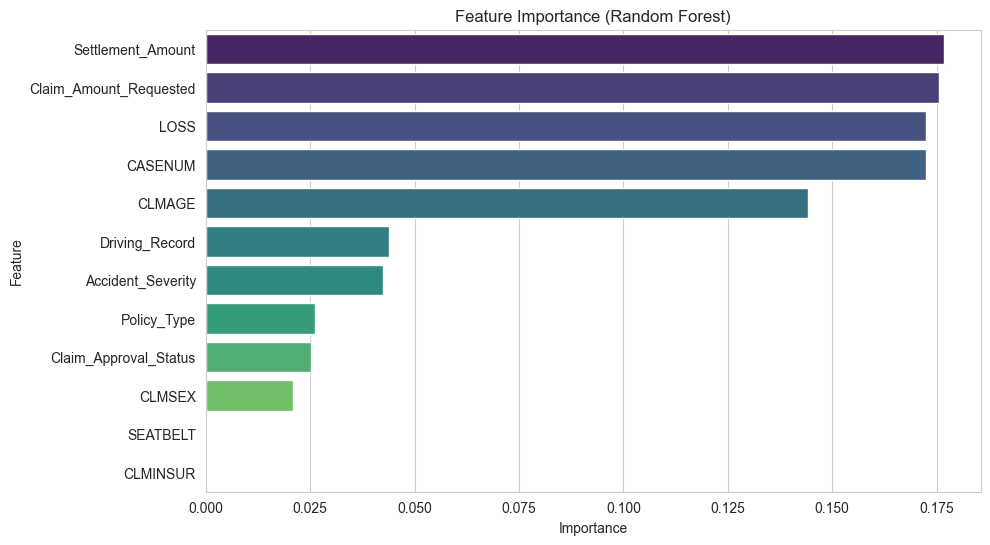

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [196]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-1.182463,0,-1.134323,0.0,0.0,1.137765,-1.140900,1.239846,-1.029498,1.039589,-1.126567,1.028772,-1.229024
1,-1.182675,1,0.881583,0.0,0.0,-0.565764,-0.776553,-1.194431,-0.726652,1.039589,-0.530617,-0.972033,-1.229024
2,-1.176006,1,-1.134323,0.0,0.0,-1.257822,2.008082,1.239846,1.345324,-0.961919,1.015397,-0.972033,1.184005
3,-1.175582,0,-1.134323,0.0,0.0,0.126295,-1.629515,1.239846,-1.688964,1.039589,-1.657964,-0.972033,-1.229024
4,-1.172830,1,-1.134323,0.0,0.0,0.073059,-1.408777,-1.194431,-1.439901,-0.961919,-1.431564,-0.972033,-1.229024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2.309248,1,-1.134323,0.0,0.0,0.073059,1.338753,0.022708,0.819273,-0.961919,0.960526,-0.972033,-1.229024
1336,2.309248,0,0.881583,0.0,0.0,0.924824,-1.561459,0.022708,-1.568253,-0.961919,-1.540208,1.028772,-0.022510
1337,2.309248,1,0.881583,0.0,0.0,0.552177,1.738174,1.239846,1.367855,1.039589,1.618107,1.028772,1.184005
1338,2.309248,0,0.881583,0.0,0.0,-1.098116,0.855000,-1.194431,1.193936,1.039589,1.118898,1.028772,-1.229024


In [197]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,-1.182463,0,-1.134323,0.0,0.0,1.137765,-1.140900,1.239846,-1.029498,1.039589,-1.126567,1.028772,-1.229024
1,-1.182675,1,0.881583,0.0,0.0,-0.565764,-0.776553,-1.194431,-0.726652,1.039589,-0.530617,-0.972033,-1.229024
2,-1.176006,1,-1.134323,0.0,0.0,-1.257822,2.008082,1.239846,1.345324,-0.961919,1.015397,-0.972033,1.184005
3,-1.175582,0,-1.134323,0.0,0.0,0.126295,-1.629515,1.239846,-1.688964,1.039589,-1.657964,-0.972033,-1.229024
4,-1.172830,1,-1.134323,0.0,0.0,0.073059,-1.408777,-1.194431,-1.439901,-0.961919,-1.431564,-0.972033,-1.229024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2.309248,1,-1.134323,0.0,0.0,0.073059,1.338753,0.022708,0.819273,-0.961919,0.960526,-0.972033,-1.229024
1336,2.309248,0,0.881583,0.0,0.0,0.924824,-1.561459,0.022708,-1.568253,-0.961919,-1.540208,1.028772,-0.022510
1337,2.309248,1,0.881583,0.0,0.0,0.552177,1.738174,1.239846,1.367855,1.039589,1.618107,1.028772,1.184005
1338,2.309248,0,0.881583,0.0,0.0,-1.098116,0.855000,-1.194431,1.193936,1.039589,1.118898,1.028772,-1.229024


In [198]:
##  RANDOM FOREST CLASSIFIER

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       128
           1       0.57      0.54      0.56       140

    accuracy                           0.55       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.55      0.55      0.55       268

Confusion Matrix:
[[71 57]
 [64 76]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best model for prediction
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')
